# State-wise Sales and Segment Analysis of India's EV Market (2001–2024)

This project presents a comprehensive analysis of the Indian Electric Vehicle (EV) market from 2001 to 2024. Using state-wise EV sales data, vehicle categories, and year-on-year performance, the study aims to extract key insights into sales dynamics across regions and vehicle types.

The primary objective of this analysis is to:

* Understand overall sales growth trends over the years.

* Identify high-performing states and key market regions.

* Analyze vehicle class and category preferences across states.

* Detect seasonality patterns in EV adoption.

* Segment states into strategic clusters based on total sales and growth rates to highlight mature, emerging, and low-priority markets.

* Provide actionable business recommendations for product focus, marketing, and expansion strategies.

* This data-driven approach will help stakeholders in the EV industry—manufacturers, investors, and policymakers—make informed decisions about market targeting, product offerings, and infrastructure investments.



## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mticker
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## Data Overview and Cleaning

In [4]:
df_in = pd.read_csv(r"C:\Users\AASHIK\Downloads\Projects\feynn\New folder\EV_India.csv")
df_in.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [5]:
import pandas as pd
from IPython.display import display

def full_dataset_summary(df, df_name="Dataset"):
    print(f"\nSummary Report for: {df_name}")
    print("=" * 60)
    
    # Shape and Size
    print(f" Shape (Rows, Columns): {df.shape}")
    print(f"Total Elements (size): {df.size}")
    print("=" * 60)
    
    # Column Names
    print("\nColumns:", list(df.columns))
    print("=" * 60)

    # Data Types
    print("\nData Types:")
    display(pd.DataFrame(df.dtypes, columns=["Data Type"]))
    print("=" * 60)
    
    # Missing Values
    print("\nMissing Values per Column:")
    display(pd.DataFrame(df.isnull().sum(), columns=["Missing Values"]))
    print("=" * 60)

    # Duplicate Check
    duplicates = df.duplicated().sum()
    print(f"Duplicate Rows: {duplicates}")
    print("   ")
    print("=" * 60)
    
    # df.info() as text output
    print("\nDataFrame Info:")
    print("-" * 40)
    df.info()
    print("=" * 60)

# First 5 rows for preview
    print("\nSample Data Preview (Top 5 Rows):")
    display(df.head())
    print("=" * 60)

full_dataset_summary(df_in,"EV_India.csv")


Summary Report for: EV_India.csv
 Shape (Rows, Columns): (96845, 8)
Total Elements (size): 774760

Columns: ['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity']

Data Types:


,Data Type
Year,float64
Month_Name,object
Date,object
State,object
Vehicle_Class,object
Vehicle_Category,object
Vehicle_Type,object
EV_Sales_Quantity,float64



Missing Values per Column:


,Missing Values
Year,0
Month_Name,0
Date,0
State,0
Vehicle_Class,0
Vehicle_Category,0
Vehicle_Type,0
EV_Sales_Quantity,0


Duplicate Rows: 0
   

DataFrame Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB

Sample Data Preview (Top 5 Rows):


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [6]:
for col in df_in.columns:
    unique_values = df_in[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values ({len(unique_values)}): {unique_values}\n")


Column: Year
Unique Values (11): [2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022. 2023. 2024.]

Column: Month_Name
Unique Values (12): ['jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'oct' 'nov' 'dec']

Column: Date
Unique Values (121): ['1/1/2014' '1/1/2015' '1/1/2016' '1/1/2017' '1/1/2018' '1/1/2019'
 '1/1/2020' '1/1/2021' '1/1/2022' '1/1/2023' '1/1/2024' '2/1/2014'
 '2/1/2015' '2/1/2016' '2/1/2017' '2/1/2018' '2/1/2019' '2/1/2020'
 '2/1/2021' '2/1/2022' '2/1/2023' '3/1/2014' '3/1/2015' '3/1/2016'
 '3/1/2017' '3/1/2018' '3/1/2019' '3/1/2020' '3/1/2021' '3/1/2022'
 '3/1/2023' '4/1/2014' '4/1/2015' '4/1/2016' '4/1/2017' '4/1/2018'
 '4/1/2019' '4/1/2020' '4/1/2021' '4/1/2022' '4/1/2023' '5/1/2014'
 '5/1/2015' '5/1/2016' '5/1/2017' '5/1/2018' '5/1/2019' '5/1/2020'
 '5/1/2021' '5/1/2022' '5/1/2023' '6/1/2014' '6/1/2015' '6/1/2016'
 '6/1/2017' '6/1/2018' '6/1/2019' '6/1/2020' '6/1/2021' '6/1/2022'
 '6/1/2023' '7/1/2014' '7/1/2015' '7/1/2016' '7/1/2017' '7/1/2018'
 '7/1/2019' '

## Feature Engineering

In [8]:
df_in['Date'] = pd.to_datetime(df_in['Date'], format='%d/%m/%Y')
df_in['EV_Sales_Quantity'] = df_in['EV_Sales_Quantity'].astype(int)
df_in['Year'] = df_in['Year'].astype(int)

In [9]:
df_in['Month'] = df_in['Date'].dt.month

In [10]:
print("\nData Types:")
display(pd.DataFrame(df_in.dtypes, columns=["Data Type"]))
print("=" * 60)


Data Types:


,Data Type
Year,int32
Month_Name,object
Date,datetime64[ns]
State,object
Vehicle_Class,object
Vehicle_Category,object
Vehicle_Type,object
EV_Sales_Quantity,int32
Month,int32


In [11]:
df_in.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0,1
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0,1
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0,1
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0,1
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0,1


## Exploratory Data Analysis (EDA) – Visualizations

### Year-wise EV Sales Trend

In [14]:
year_sales = df_in.groupby('Year')['EV_Sales_Quantity'].sum().reset_index().sort_values(by='EV_Sales_Quantity', ascending=False)
year_sales

,Year,EV_Sales_Quantity
9,2023,1525179
8,2022,1024723
7,2021,331498
5,2019,166819
10,2024,143182
4,2018,130254
6,2020,124684
3,2017,87420
2,2016,49855
1,2015,7805


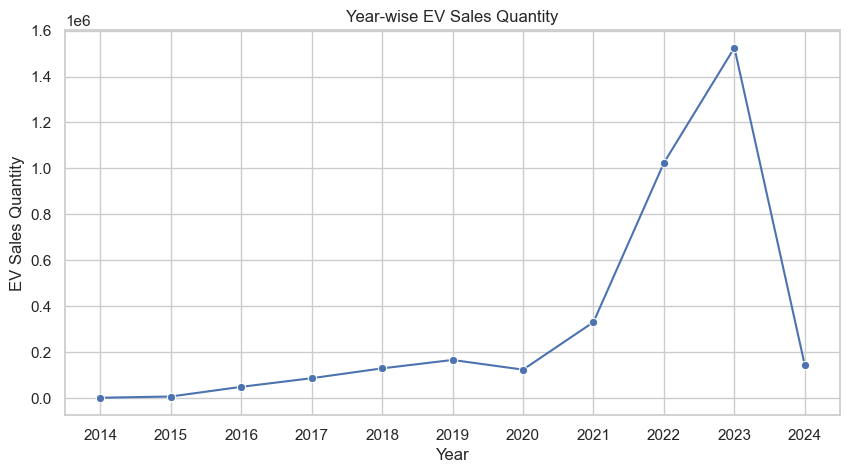

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=year_sales, marker='o')
plt.title('Year-wise EV Sales Quantity')
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.xticks(year_sales['Year']) 
#plt.ticklabel_format(style='plain', axis='y')
plt.show()

### State-wise Total EV Sales Quantity

In [17]:
state_sales= df_in.groupby('State').agg({'EV_Sales_Quantity': 'sum'}).reset_index().sort_values(by='EV_Sales_Quantity', ascending=False)
display(state_sales)

,State,EV_Sales_Quantity
31,Uttar Pradesh,732074
19,Maharashtra,401535
15,Karnataka,315498
8,Delhi,268538
27,Rajasthan,228573
4,Bihar,213465
29,Tamil Nadu,206902
10,Gujarat,176713
3,Assam,151917
16,Kerala,133246


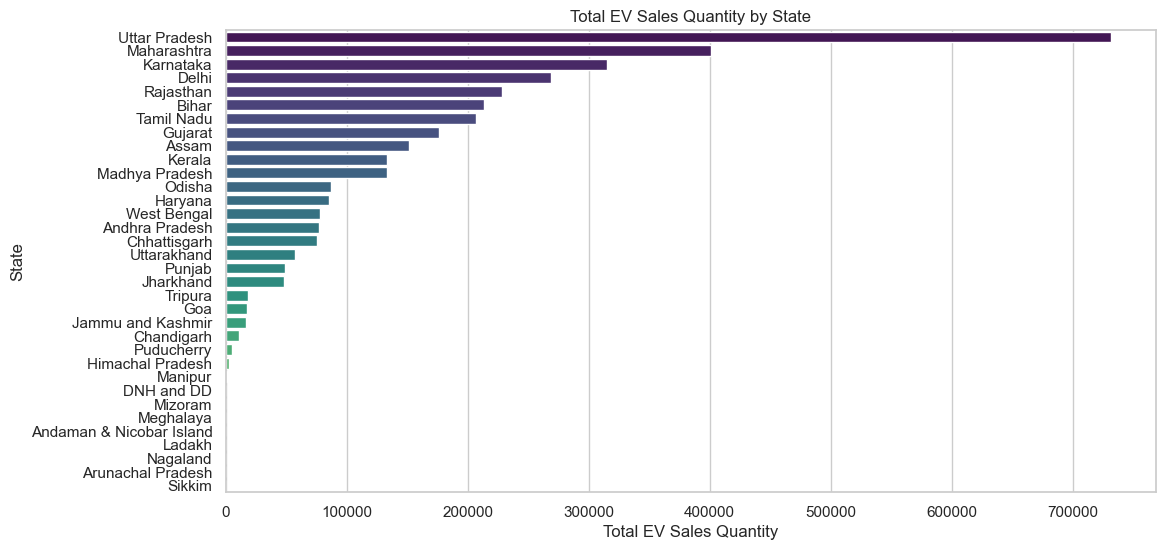

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='EV_Sales_Quantity', y='State', data=state_sales, palette='viridis')
plt.title('Total EV Sales Quantity by State')
plt.xlabel('Total EV Sales Quantity')
plt.ylabel('State')
plt.show()


### Seasonality in EV Sales (Monthly Trends)

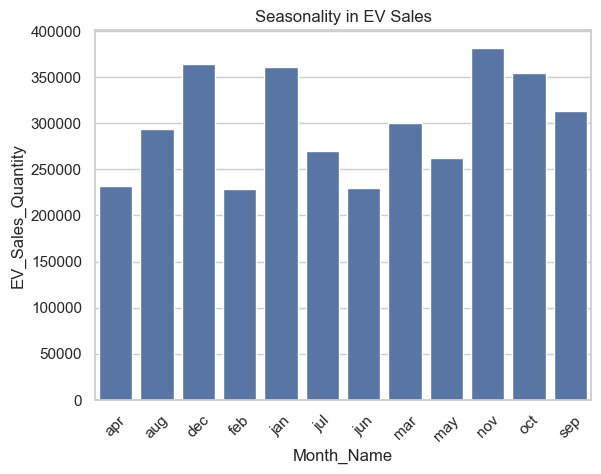

In [20]:
monthly_sales = df_in.groupby('Month_Name')['EV_Sales_Quantity'].sum().reset_index()
sns.barplot(data=monthly_sales, x='Month_Name', y='EV_Sales_Quantity')
plt.title('Seasonality in EV Sales')
plt.xticks(rotation=45)
plt.show()


### Year-Month EV Sales -Heatmap 

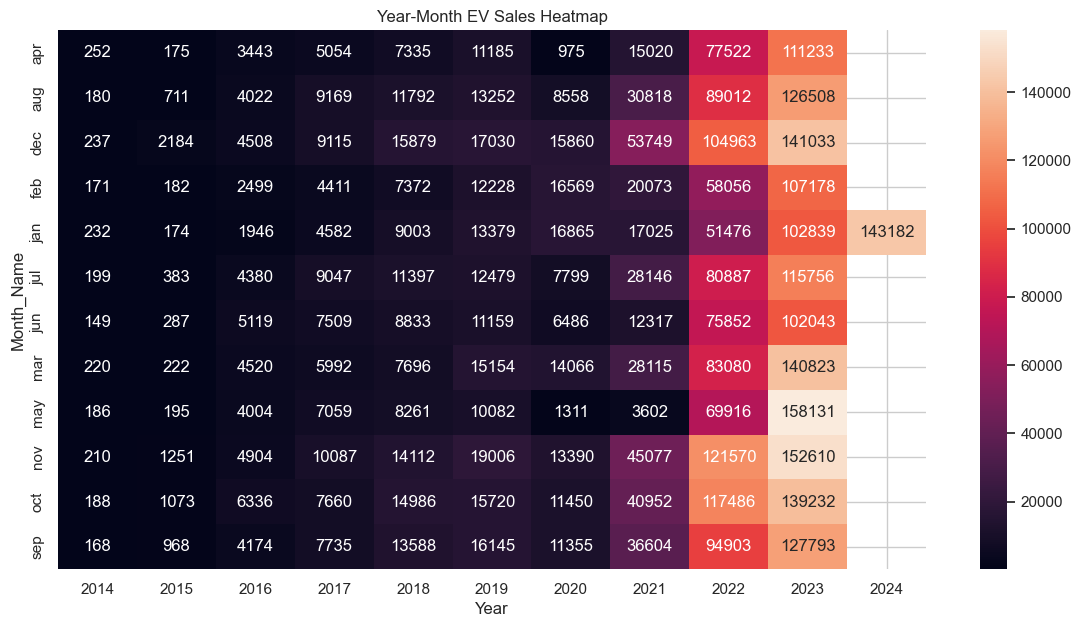

In [22]:
pivot = df_in.pivot_table(index='Month_Name', columns='Year', values='EV_Sales_Quantity', aggfunc='sum')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.title('Year-Month EV Sales Heatmap')
plt.show()


### Total EV Sales Quantity  by Vehicle Category

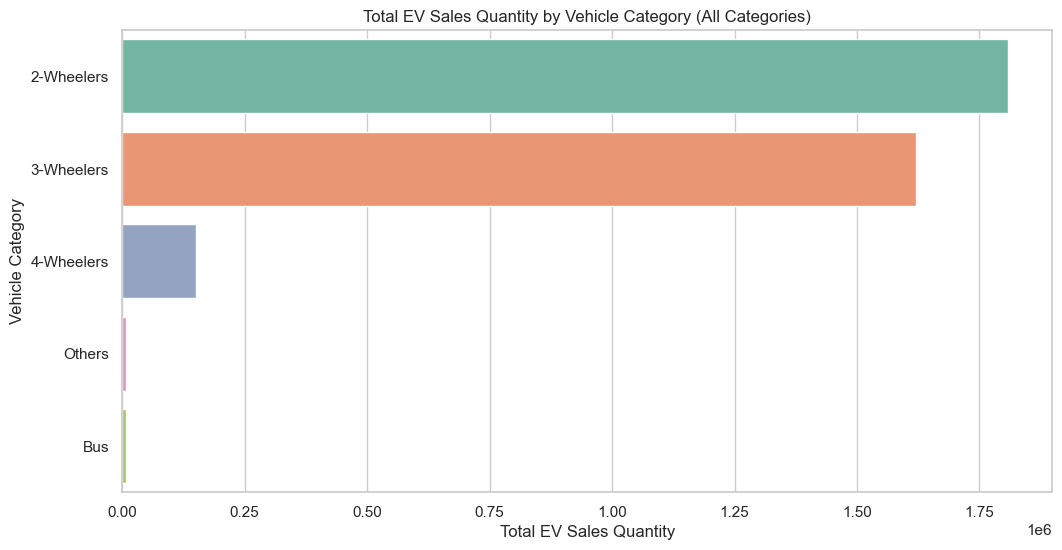

In [24]:
# Group total sales by Vehicle Category
category_sales = df_in.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().reset_index().sort_values(by='EV_Sales_Quantity', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='EV_Sales_Quantity', y='Vehicle_Category', data=category_sales, palette='Set2')

plt.title('Total EV Sales Quantity by Vehicle Category (All Categories)')
plt.xlabel('Total EV Sales Quantity')
plt.ylabel('Vehicle Category')

plt.show()

### Top 5 States by EV Sales Share (%)

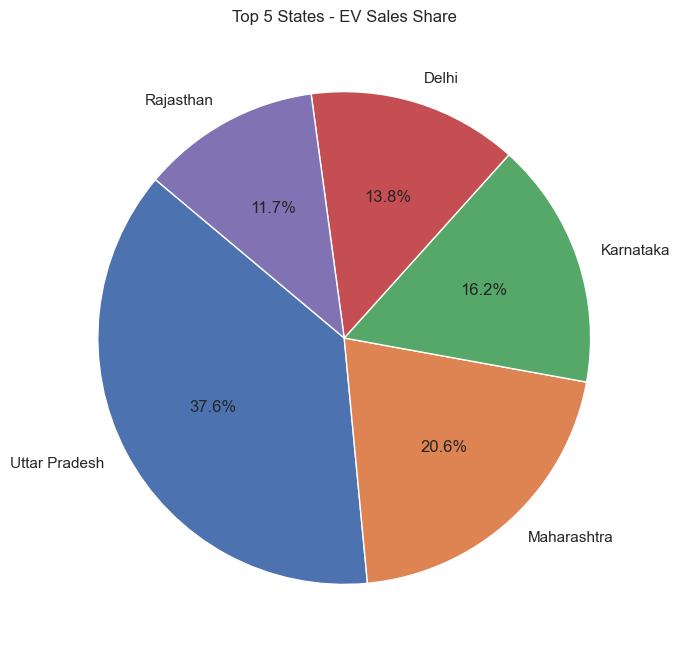

In [26]:
top_states = state_sales.head(5)
plt.figure(figsize=(8,8))
plt.pie(top_states['EV_Sales_Quantity'], labels=top_states['State'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 States - EV Sales Share')
plt.show()


### EV Sales by State and Year – Heatmap

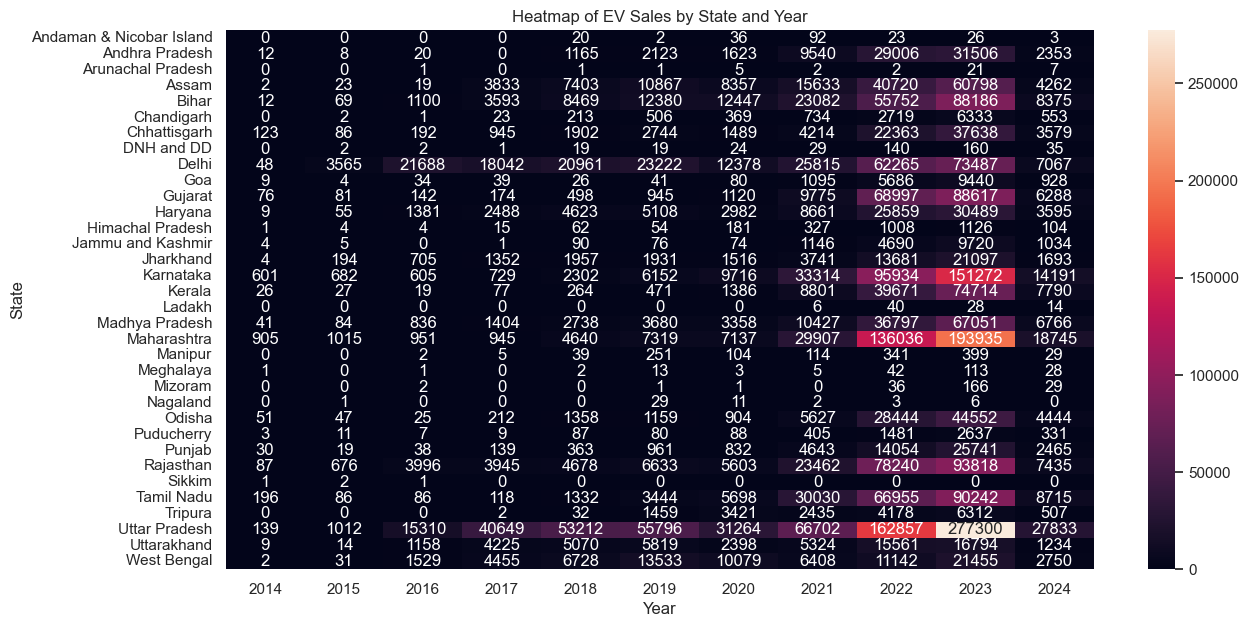

In [28]:
pivot = df_in.pivot_table(values='EV_Sales_Quantity', index='State', columns='Year', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, fmt='g')
plt.title('Heatmap of EV Sales by State and Year')
plt.show()

###  Yearly EV Sales Trend for Top 5 States

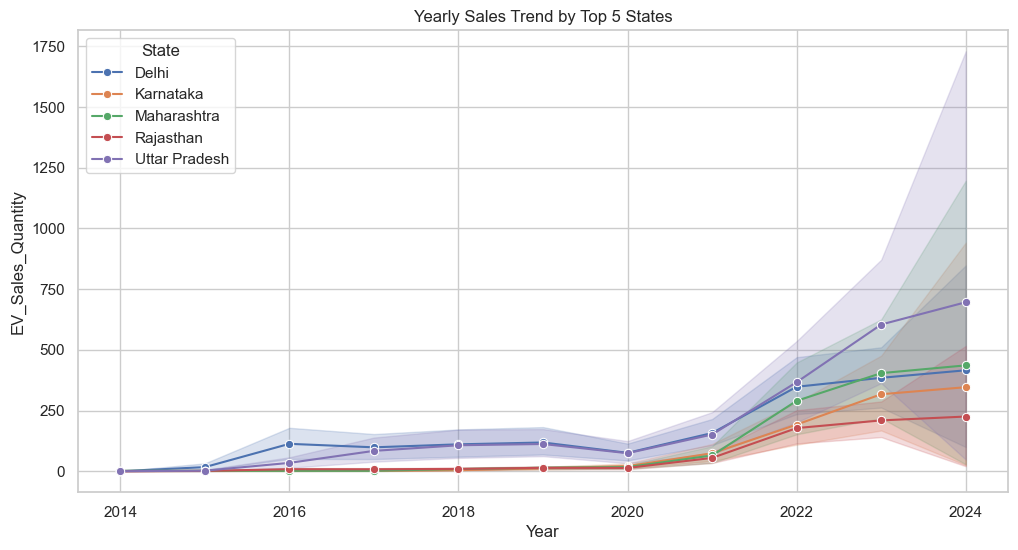

In [30]:
top_states = df_in.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(5).index

df_top_states = df_in[df_in['State'].isin(top_states)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_top_states, x='Year', y='EV_Sales_Quantity', hue='State', marker='o')
plt.title('Yearly Sales Trend by Top 5 States')
plt.show()


### State-wise Percentage Distribution of EV Sales by Vehicle Category

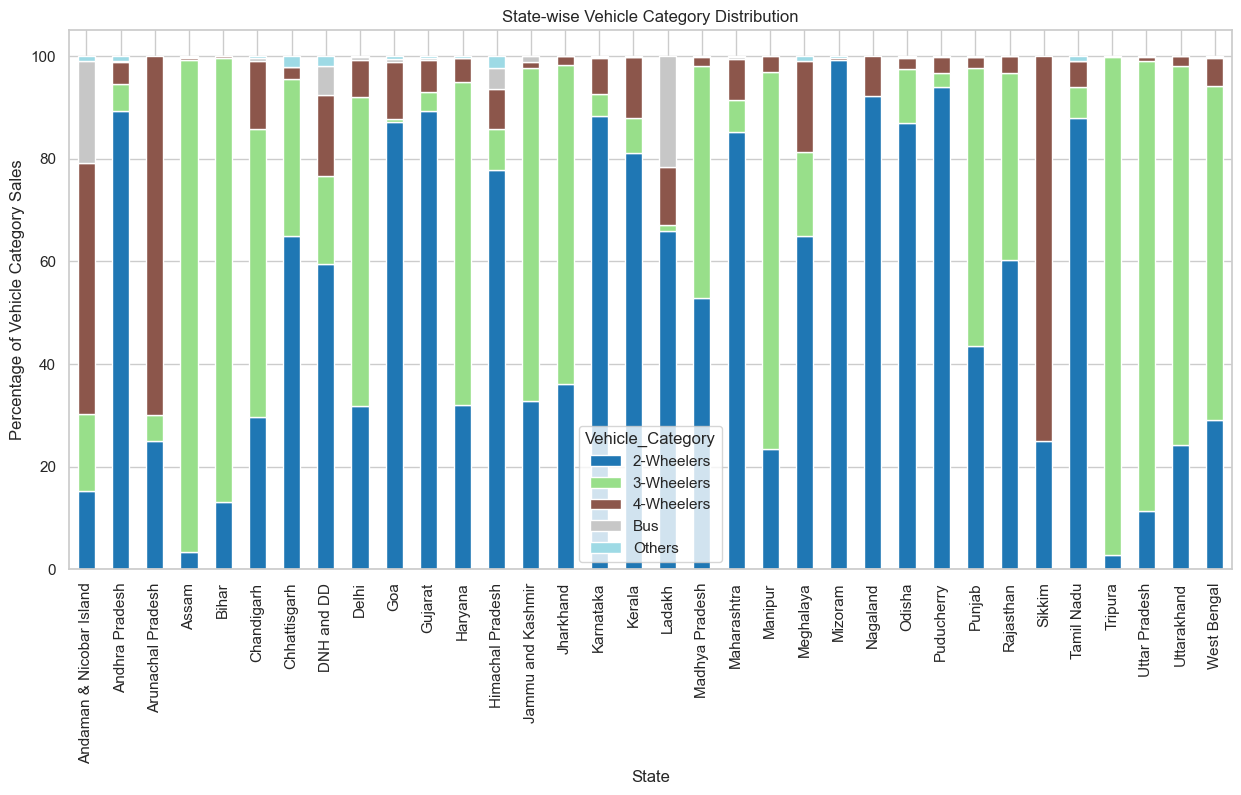

In [32]:
category_state = df_in.groupby(['State', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()

pivot_category = category_state.pivot(index='State', columns='Vehicle_Category', values='EV_Sales_Quantity').fillna(0)

pivot_category_percent = pivot_category.div(pivot_category.sum(axis=1), axis=0) * 100

pivot_category_percent.plot(kind='bar', stacked=True, figsize=(15,7), colormap='tab20')
plt.ylabel('Percentage of Vehicle Category Sales')
plt.title('State-wise Vehicle Category Distribution')
plt.show()


### Top Performing States and Vehicle Classes in EV Market

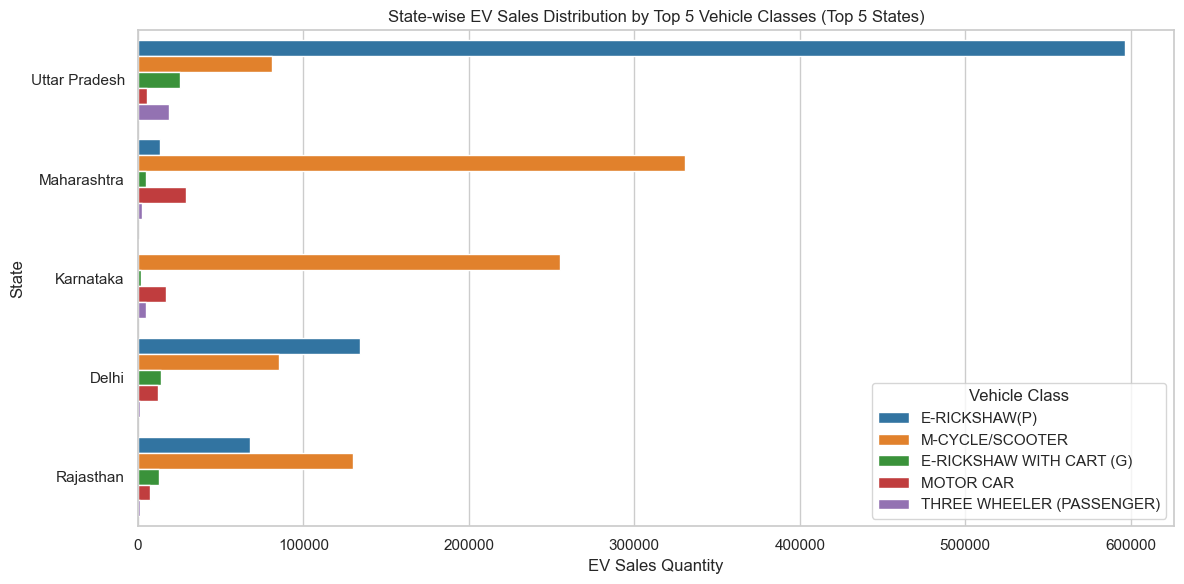

In [34]:
top_classes = df_in.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum().reset_index()\
    .sort_values(by='EV_Sales_Quantity', ascending=False).head(5)['Vehicle_Class']
top_states = df_in.groupby('State')['EV_Sales_Quantity'].sum().reset_index()\
    .sort_values(by='EV_Sales_Quantity', ascending=False).head(5)['State']
df_top = df_in[(df_in['Vehicle_Class'].isin(top_classes)) & (df_in['State'].isin(top_states))]

top_state_class_sales = df_top.groupby(['State', 'Vehicle_Class'])['EV_Sales_Quantity'].sum().reset_index()

top_state_class_sales = top_state_class_sales.sort_values(by=['State', 'EV_Sales_Quantity'], ascending=[True, False])

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_state_class_sales,
    x='EV_Sales_Quantity',
    y='State',
    hue='Vehicle_Class',
    order=top_states,
    palette='tab10'
)
plt.title('State-wise EV Sales Distribution by Top 5 Vehicle Classes (Top 5 States)')
plt.xlabel('EV Sales Quantity')
plt.ylabel('State')
plt.legend(title='Vehicle Class')
plt.tight_layout()
plt.show()


## Geographic Segmentation Using Clustering


### Preparing Data for Clustering

In [37]:
state_sales.rename(columns={'EV_Sales_Quantity': 'Total_Sales'}, inplace=True)
yearly = df_in.groupby(['State', 'Year'])['EV_Sales_Quantity'].sum().reset_index()

growth_rate = yearly.groupby('State')['EV_Sales_Quantity'].pct_change().groupby(yearly['State']).mean().reset_index(name='Avg_Growth_Rate')

# Merge with Total Sales
final_df = pd.merge(state_sales, growth_rate, on='State', how='left')
final_df.fillna(0, inplace=True)

display(final_df.head())


,State,Total_Sales,Avg_Growth_Rate
0,Uttar Pradesh,732074,2.436021
1,Maharashtra,401535,1.077606
2,Karnataka,315498,0.861548
3,Delhi,268538,7.976292
4,Rajasthan,228573,1.691754


In [38]:
# Check for infinity
print(np.isinf(final_df[['Total_Sales', 'Avg_Growth_Rate']]).sum())
# Check for NaN
print(final_df[['Total_Sales', 'Avg_Growth_Rate']].isna().sum())


Total_Sales         0
Avg_Growth_Rate    12
dtype: int64
Total_Sales        0
Avg_Growth_Rate    0
dtype: int64


In [39]:
final_df = final_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Total_Sales', 'Avg_Growth_Rate'])


In [40]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(final_df[['Total_Sales', 'Avg_Growth_Rate']])


### KMeans Clustering for State Segmentation

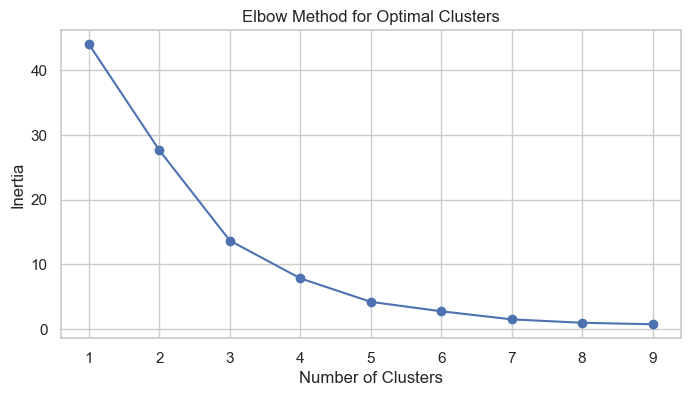

In [42]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [43]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
final_df['Cluster'] = kmeans.fit_predict(scaled_features)
final_df.sort_values(by='Cluster').reset_index(drop=True)


,State,Total_Sales,Avg_Growth_Rate,Cluster
0,Madhya Pradesh,133182,1.644450,0
1,Puducherry,5139,1.744009,0
2,Goa,17382,2.492503,0
3,Jharkhand,47871,5.501807,0
4,Punjab,49285,1.295068,0
5,Uttarakhand,57606,8.697390,0
6,Chhattisgarh,75275,1.176671,0
7,West Bengal,78112,6.643099,0
8,Haryana,85250,3.375568,0
9,Odisha,86823,2.091811,0


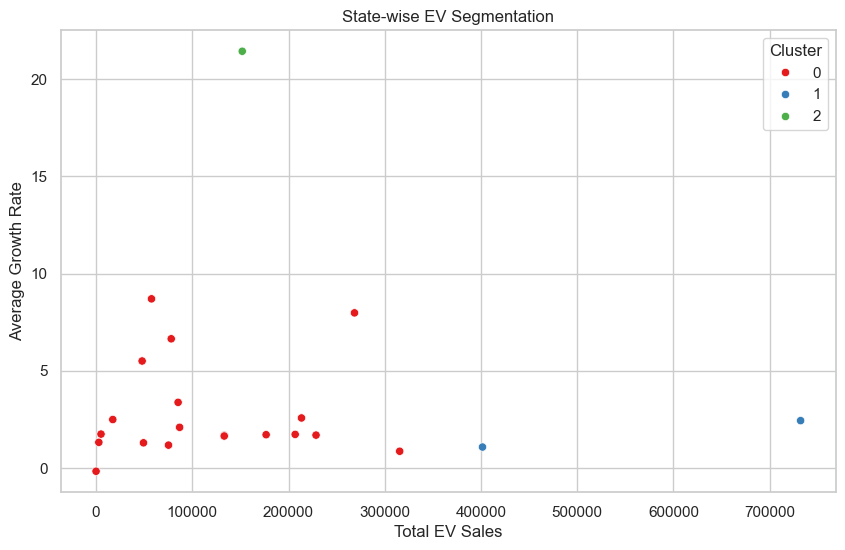

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total_Sales', y='Avg_Growth_Rate', hue='Cluster', data=final_df, palette='Set1')
plt.title('State-wise EV Segmentation')
plt.xlabel('Total EV Sales')
plt.ylabel('Average Growth Rate')
plt.show()


In [45]:
cluster_summary = final_df.groupby('Cluster')[['Total_Sales', 'Avg_Growth_Rate']].mean().reset_index()
print(cluster_summary)


   Cluster    Total_Sales  Avg_Growth_Rate
0        0  114828.947368         2.844190
1        1  566804.500000         1.756813
2        2  151917.000000        21.426983


In [46]:
cluster_mapping = {
    0: 'Low Sales & Growth Market',
    1: 'High Sales but Low Growth Market',
    2: 'Medium Sales, High Growth Market'
}

final_df['Cluster_Name'] = final_df['Cluster'].map(cluster_mapping)

In [47]:
final_df['Cluster_Name'].value_counts()


Cluster_Name
Low Sales & Growth Market           19
High Sales but Low Growth Market     2
Medium Sales, High Growth Market     1
Name: count, dtype: int64

### Cluster Distribution Pie Chart

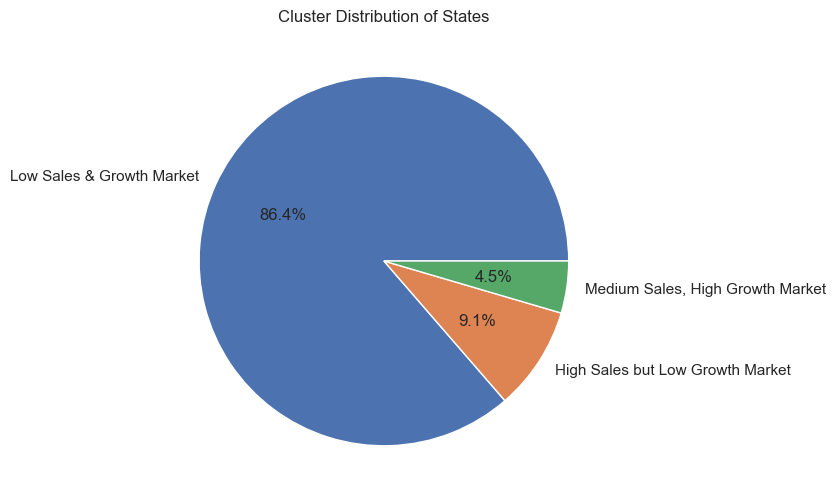

In [49]:
plt.figure(figsize=(6,6))
final_df['Cluster_Name'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Cluster Distribution of States')
plt.ylabel('')
plt.show()



##  **Final Summary**

This project delivers a comprehensive analysis of the Indian Electric Vehicle (EV) market from 2001 to 2024, focusing on sales distribution by geography and vehicle type, along with growth patterns and market segmentation. The goal was to extract actionable insights to guide strategic decisions for market expansion and product focus.

### **1. Geographic Performance:**

* **High-Sales States**: Uttar Pradesh, Maharashtra, and Karnataka consistently lead in total EV sales, reflecting strong market maturity and infrastructure.
* **High-Growth States**: Assam and Uttarakhand display high growth rates, indicating emerging market potential despite lower historical sales.
* **Seasonal Trends**: Clear seasonality observed, with peak sales in festive and year-end periods, useful for sales planning and promotional activities.

### **2. Vehicle Type & Class Insights:**

* **Dominant Categories**: Two-Wheelers dominate nationwide EV sales, followed by Three-Wheelers, making them critical for volume-driven strategies.
* **Emerging Segments**: Growth in Passenger Vehicles and E-Cars is notable in developed states, suggesting evolving consumer preferences.
* **State-Class Relationship**: Vehicle class preferences vary by state—highlighting opportunities for tailored product offerings.

### **3. Cluster Segmentation Findings:**

* **Cluster 0**: High Sales, Low Growth – Mature markets (e.g., UP, Maharashtra) requiring retention and upgrade strategies.
* **Cluster 1**: Low Sales, Low Growth – Limited opportunity zones.
* **Cluster 2**: Medium Sales, High Growth – Growth markets (e.g., Assam) suitable for aggressive expansion and awareness campaigns.

### **4. Strategic Recommendations:**

* **Geographic Targeting**: Focus expansion efforts in high-growth, medium-sales states while sustaining dominance in top-selling regions.
* **Product Focus**: Continue leadership in Two-Wheelers and Three-Wheelers while increasing presence in emerging Passenger Vehicle segments.
* **Seasonal Planning**: Align marketing and inventory planning with clear seasonal demand spikes.
* **Cluster-Based Strategy**: Use data-driven segmentation to customize state-level sales and product strategies.



**Overall Conclusion**:
The Indian EV market shows a diverse growth landscape with clear differences by geography and vehicle type. By leveraging data-driven segmentation, businesses can unlock high-growth opportunities and optimize product portfolios to accelerate EV adoption across India.

